In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Extraction

In [2]:
data = pd.read_csv('/Users/rohanpatil/Desktop/Rohan Patil - DSAI/Course Notebooks/projects/ecommerce/data.csv')

In [7]:
data.columns = data.columns.str.lower()

In [8]:
data.head()

,order id,order date,customer name,region,city,category,sub-category,product name,quantity,unit price,discount,sales,profit,payment mode
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card
2,10003,2023-11-04,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card


In [9]:
data.columns

Index(['order id', 'order date', 'customer name', 'region', 'city', 'category',
       'sub-category', 'product name', 'quantity', 'unit price', 'discount',
       'sales', 'profit', 'payment mode'],
      dtype='object')

## 2. Data Analysis

## Findings :
### 1. Most Profitable Region : North

In [10]:
data['region'].unique()

array(['South', 'North', 'East', 'West'], dtype=object)

In [11]:
data.groupby(['region'])['profit'].mean()

region
East     16347.578121
North    16570.655536
South    15023.085860
West     15777.697937
Name: profit, dtype: float64

<Axes: xlabel='region', ylabel='profit'>

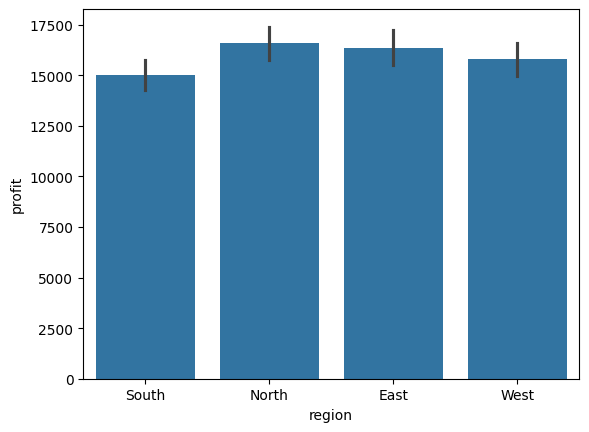

In [12]:
sns.barplot(x='region', y='profit', data=data)

In [17]:
data.groupby(['region'])['city'].count()

region
East     1256
North    1288
South    1215
West     1241
Name: city, dtype: int64

## South Bangalore Avg_Profits 

In [22]:
import seaborn as sns

<Axes: xlabel='region', ylabel='profit'>

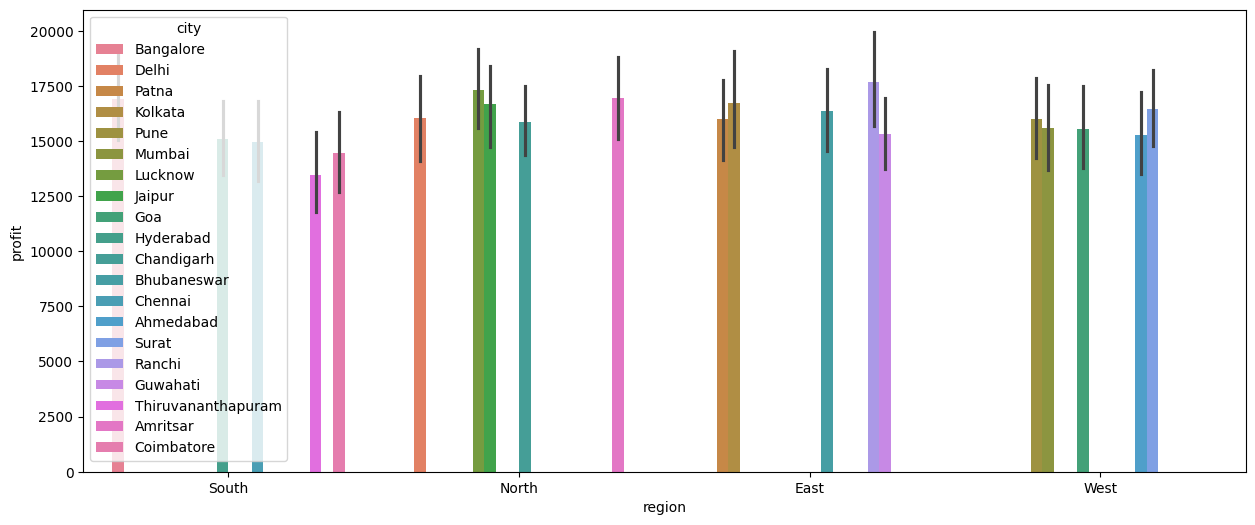

In [25]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'region', y='profit', data=data, hue='city')

## Which Region Sold the highest no. of books ?

In [32]:
data[data['category']== 'Books'].groupby(['region','category'])['quantity'].count() 

region  category
East    Books       128
North   Books       143
South   Books       121
West    Books       136
Name: quantity, dtype: int64

## Which Sub - category has the highest average discount ?

In [35]:
data.groupby(['sub-category'])['discount'].mean().sort_values(ascending=False).head(3)

sub-category
Puzzle     11.329787
Shampoo    11.091954
Camera     10.957447
Name: discount, dtype: float64

## South : Region , Category : Kitchen
### 1) Payment Mode Count 2) Total Sales 3) Total Profit 4) Quntity Sold

In [45]:
df = data[ (data['region'] =='South') & (data['category'] == 'Kitchen') ]

In [46]:
df.head()

,order id,order date,customer name,region,city,category,sub-category,product name,quantity,unit price,discount,sales,profit,payment mode
61,10062,2024-04-09,Azad Kunda,South,Chennai,Kitchen,Cookware Set,Cookware Set Nisi,2,13751,15,23376.70,5552.74,Debit Card
163,10164,2024-06-21,Inaaya Tandon,South,Hyderabad,Kitchen,Juicer,Juicer Possimus,5,44801,15,190404.25,16507.93,UPI
186,10187,2024-08-03,Samiha Halder,South,Hyderabad,Kitchen,Cookware Set,Cookware Set Minima,2,8566,15,14562.20,2893.23,Credit Card
263,10264,2024-02-05,Drishya Mangal,South,Coimbatore,Kitchen,Juicer,Juicer Voluptate,4,39061,20,124995.20,30886.70,Credit Card
304,10305,2025-08-31,Vedika Shetty,South,Chennai,Kitchen,Cookware Set,Cookware Set Eligendi,4,18577,0,74308.00,9828.04,UPI


## Which category has the highest profit percentage in region (South, North)

In [47]:
df['payment mode'].value_counts()

payment mode
Net Banking    27
Debit Card     26
UPI            25
Credit Card    23
COD            23
Name: count, dtype: int64

In [56]:
df['sales'].sum()

13399212.0

In [55]:
df['sales'].mean()

108058.16129032258

In [54]:
df['sales'].agg({'total_sales': 'sum',
                   'average_sales': 'mean'
                   })

total_sales      1.339921e+07
average_sales    1.080582e+05
Name: sales, dtype: float64

In [58]:
df['quantity'].count()

124

In [64]:
df.agg({'sales': ['sum', 'mean'],
            'quantity': ['sum'],})

,sales,quantity
sum,1.339921e+07,373.0
mean,1.080582e+05,NaN


In [61]:
df.head()

,order id,order date,customer name,region,city,category,sub-category,product name,quantity,unit price,discount,sales,profit,payment mode
61,10062,2024-04-09,Azad Kunda,South,Chennai,Kitchen,Cookware Set,Cookware Set Nisi,2,13751,15,23376.70,5552.74,Debit Card
163,10164,2024-06-21,Inaaya Tandon,South,Hyderabad,Kitchen,Juicer,Juicer Possimus,5,44801,15,190404.25,16507.93,UPI
186,10187,2024-08-03,Samiha Halder,South,Hyderabad,Kitchen,Cookware Set,Cookware Set Minima,2,8566,15,14562.20,2893.23,Credit Card
263,10264,2024-02-05,Drishya Mangal,South,Coimbatore,Kitchen,Juicer,Juicer Voluptate,4,39061,20,124995.20,30886.70,Credit Card
304,10305,2025-08-31,Vedika Shetty,South,Chennai,Kitchen,Cookware Set,Cookware Set Eligendi,4,18577,0,74308.00,9828.04,UPI


In [62]:
df.shape

(124, 14)

## Which category has the highest profit percentage in region (South, North)

In [75]:
df = data[(data['region'] == 'North') | (data['region'] == 'South')]

In [79]:
df = data[data['region'].isin(['North', 'South'])]

In [80]:
df.head()

,order id,order date,customer name,region,city,category,sub-category,product name,quantity,unit price,discount,sales,profit,payment mode
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card
7,10008,2025-08-17,Misha Dua,North,Lucknow,Books,Biography,Biography Vel,1,15885,10,14296.5,1289.03,Debit Card
8,10009,2025-03-07,Arhaan Vala,North,Jaipur,Groceries,Spices,Spices Expedita,1,40834,20,32667.2,3700.89,Credit Card
10,10011,2025-08-24,Divyansh Thaman,North,Lucknow,Kitchen,Cookware Set,Cookware Set Doloremque,2,10761,20,17217.6,4139.82,Credit Card


In [84]:
df['profit_percentage'] = df['profit'] / df['sales'] * 100

/var/folders/h8/x2xfqyjs5cl005fb579670gw0000gn/T/ipykernel_6088/2024276389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profit_percentage'] = df['profit'] / df['sales'] * 100


In [85]:
df.head()

,order id,order date,customer name,region,city,category,sub-category,product name,quantity,unit price,discount,sales,profit,payment mode,profit_percentage
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card,15.262911
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card,18.675620
7,10008,2025-08-17,Misha Dua,North,Lucknow,Books,Biography,Biography Vel,1,15885,10,14296.5,1289.03,Debit Card,9.016403
8,10009,2025-03-07,Arhaan Vala,North,Jaipur,Groceries,Spices,Spices Expedita,1,40834,20,32667.2,3700.89,Credit Card,11.329070
10,10011,2025-08-24,Divyansh Thaman,North,Lucknow,Kitchen,Cookware Set,Cookware Set Doloremque,2,10761,20,17217.6,4139.82,Credit Card,24.044118


In [88]:
df.groupby(['category'])['profit_percentage'].mean().sort_values(ascending=False)

category
Electronics    15.504515
Toys           15.234720
Home Decor     15.046251
Kitchen        15.028310
Furniture      14.976600
Clothing       14.974555
Groceries      14.920975
Sports         14.847864
Books          14.424683
Beauty         14.116591
Name: profit_percentage, dtype: float64

In [90]:
data['profit_percentage'] = data['profit'] / data['sales'] * 100

In [95]:
print(data.groupby(['region','category'])['profit_percentage'].mean())

region  category   
East    Beauty         14.818458
        Books          14.602503
        Clothing       15.846636
        Electronics    15.403052
        Furniture      14.764503
        Groceries      14.786294
        Home Decor     14.957937
        Kitchen        14.249116
        Sports         14.757169
        Toys           14.897199
North   Beauty         13.281567
        Books          13.892981
        Clothing       14.841311
        Electronics    16.228859
        Furniture      15.323202
        Groceries      15.049144
        Home Decor     14.943151
        Kitchen        15.177975
        Sports         14.846858
        Toys           14.893888
South   Beauty         15.058866
        Books          15.053059
        Clothing       15.099045
        Electronics    14.736460
        Furniture      14.586671
        Groceries      14.783030
        Home Decor     15.175344
        Kitchen        14.888302
        Sports         14.848951
        Toys           

In [96]:
data.head()

,order id,order date,customer name,region,city,category,sub-category,product name,quantity,unit price,discount,sales,profit,payment mode,profit_percentage
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card,15.262911
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card,18.675620
2,10003,2023-11-04,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card,9.561640
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI,22.893273
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card,20.096329


In [99]:
new_data = data[['region','city','category','sub-category','sales','profit','profit_percentage','unit price', 'discount','payment mode']]

In [100]:
new_data.head()

,region,city,category,sub-category,sales,profit,profit_percentage,unit price,discount,payment mode
0,South,Bangalore,Books,Non-Fiction,68958.6,10525.09,15.262911,36294,5,Debit Card
1,North,Delhi,Groceries,Rice,33732.0,6299.66,18.675620,42165,20,Debit Card
2,East,Patna,Kitchen,Juicer,207603.2,19850.27,9.561640,64876,20,Credit Card
3,East,Kolkata,Groceries,Oil,158610.0,36311.02,22.893273,37320,15,UPI
4,West,Pune,Clothing,Kids Wear,45033.3,9050.04,20.096329,50037,10,Debit Card


In [102]:
X = new_data.drop('profit', axis=1)

In [104]:
y = new_data['profit']

In [106]:
X

,region,city,category,sub-category,sales,profit_percentage,unit price,discount,payment mode
0,South,Bangalore,Books,Non-Fiction,68958.6,15.262911,36294,5,Debit Card
1,North,Delhi,Groceries,Rice,33732.0,18.675620,42165,20,Debit Card
2,East,Patna,Kitchen,Juicer,207603.2,9.561640,64876,20,Credit Card
3,East,Kolkata,Groceries,Oil,158610.0,22.893273,37320,15,UPI
4,West,Pune,Clothing,Kids Wear,45033.3,20.096329,50037,10,Debit Card
...,...,...,...,...,...,...,...,...,...
4995,East,Kolkata,Books,Fiction,182013.0,6.512255,60671,0,Debit Card
4996,North,Jaipur,Toys,Doll,350240.0,8.918807,70048,0,Credit Card
4997,South,Bangalore,Beauty,Lipstick,35837.7,21.841524,42162,15,Debit Card
4998,East,Kolkata,Electronics,Smartwatch,48844.8,13.520088,13568,10,Credit Card


In [107]:
y

0       10525.09
1        6299.66
2       19850.27
3       36311.02
4        9050.04
          ...   
4995    11853.15
4996    31237.23
4997     7827.50
4998     6603.86
4999     5785.85
Name: profit, Length: 5000, dtype: float64

In [109]:
X_transformed = pd.get_dummies(X, columns=['region','city','category','sub-category','payment mode'])

In [110]:
X_transformed.shape

(5000, 93)

In [111]:
y

0       10525.09
1        6299.66
2       19850.27
3       36311.02
4        9050.04
          ...   
4995    11853.15
4996    31237.23
4997     7827.50
4998     6603.86
4999     5785.85
Name: profit, Length: 5000, dtype: float64

In [112]:
from sklearn.model_selection import train_test_split

x_train,x_test , y_train , y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

In [114]:
data.shape

(5000, 15)

In [113]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3500, 93), (1500, 93), (3500,), (1500,))

In [117]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [130]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [131]:
model.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [132]:
y_pred = model.predict(x_test)

In [133]:
print(y_pred)

[  916.28 43805.32 20965.   ...  8082.14  7488.56 13670.89]


In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [134]:
mae = mean_absolute_error(y_test, y_pred)

In [135]:
mae

563.73554

In [124]:
mae

3561.656120891683

In [137]:
r2 = r2_score(y_test, y_pred)

In [138]:
r2

0.9959775082226666

In [136]:
r2

0.8911752545772904

In [140]:
mse = mean_squared_error(y_test, y_pred)

In [141]:
mse

912713.9699930004

In [128]:
mse

24692621.123040374

In [143]:
new_data

,region,city,category,sub-category,sales,profit,profit_percentage,unit price,discount,payment mode
0,South,Bangalore,Books,Non-Fiction,68958.6,10525.09,15.262911,36294,5,Debit Card
1,North,Delhi,Groceries,Rice,33732.0,6299.66,18.675620,42165,20,Debit Card
2,East,Patna,Kitchen,Juicer,207603.2,19850.27,9.561640,64876,20,Credit Card
3,East,Kolkata,Groceries,Oil,158610.0,36311.02,22.893273,37320,15,UPI
4,West,Pune,Clothing,Kids Wear,45033.3,9050.04,20.096329,50037,10,Debit Card
...,...,...,...,...,...,...,...,...,...,...
4995,East,Kolkata,Books,Fiction,182013.0,11853.15,6.512255,60671,0,Debit Card
4996,North,Jaipur,Toys,Doll,350240.0,31237.23,8.918807,70048,0,Credit Card
4997,South,Bangalore,Beauty,Lipstick,35837.7,7827.50,21.841524,42162,15,Debit Card
4998,East,Kolkata,Electronics,Smartwatch,48844.8,6603.86,13.520088,13568,10,Credit Card


In [148]:
x_new = pd.DataFrame(x_test.iloc[0]).T

In [ ]:
model.predict([[region, city,category, sub-category, sales, profit_percentage, unit price, discount, payment mode]])

In [149]:
model.predict(x_new)

array([916.28])